In [1]:
#- Analysis of Population in Seoul
#- Analysis of Crime
#- Analysis of CCTV

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#- Data Load

population = pd.read_csv("Con01_인구_2015_2020_시군구.csv", encoding='euc-kr')
population.head()

,행정구역별(읍면동),2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8,...,2020.10,2020.11,2020.12,2020.13,2020.14,2020.15,2020.16,2020.17,2020.18,2020.19
0,행정구역별(읍면동),총인구 (명),남자 (명),여자 (명),내국인-계 (명),내국인-남자 (명),내국인-여자 (명),외국인-계 (명),외국인-남자 (명),외국인-여자 (명),...,일반가구 (가구),집단가구 (가구),외국인가구 (가구),주택-계 (호),단독주택 (호),아파트 (호),연립주택 (호),다세대주택 (호),비거주용 건물내 주택 (호),주택이외의 거처 (호)
1,전국,51829136,25915207,25913929,50133493,24972588,25160905,1695643,942619,753024,...,20926710,16388,541687,18525844,3897729,11661851,521606,2230787,213871,1000903
2,읍부,5113052,2624351,2488701,4904647,2494271,2410376,208405,130080,78325,...,2021664,2353,56367,1992568,579820,1142894,79981,159041,30832,74804
3,면부,4650781,2420392,2230389,4394145,2237761,2156384,256636,182631,74005,...,2008345,4237,56296,2105345,1539804,427449,36565,69672,31855,103889
4,동부,42065303,20870464,21194839,40834701,20240556,20594145,1230602,629908,600694,...,16896701,9798,429024,14427931,1778105,10091508,405060,2002074,151184,822210


In [4]:
crime = pd.read_csv("Con01_경찰청_전국 경찰서별 강력범죄 발생 현황.csv", encoding='euc-kr')
crime.head() #- <-> tail()

,발생년도,경찰서,소계,살인,강도,절도,폭력
0,2020,서울중부서,1944,1,3,943,997
1,2020,서울종로서,1579,9,4,602,964
2,2020,서울남대문서,1281,1,2,699,579
3,2020,서울서대문서,2374,3,2,1077,1292
4,2020,서울혜화서,1331,0,3,581,747


In [5]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역별(읍면동)  325 non-null    object
 1   2020        325 non-null    object
 2   2020.1      325 non-null    object
 3   2020.2      325 non-null    object
 4   2020.3      325 non-null    object
 5   2020.4      325 non-null    object
 6   2020.5      325 non-null    object
 7   2020.6      325 non-null    object
 8   2020.7      325 non-null    object
 9   2020.8      325 non-null    object
 10  2020.9      325 non-null    object
 11  2020.10     325 non-null    object
 12  2020.11     325 non-null    object
 13  2020.12     325 non-null    object
 14  2020.13     325 non-null    object
 15  2020.14     325 non-null    object
 16  2020.15     325 non-null    object
 17  2020.16     325 non-null    object
 18  2020.17     325 non-null    object
 19  2020.18     325 non-null    object
 20  2020.19   

In [6]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264 entries, 0 to 1263
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   발생년도    1264 non-null   int64 
 1   경찰서     1264 non-null   object
 2   소계      1264 non-null   int64 
 3   살인      1264 non-null   int64 
 4   강도      1264 non-null   int64 
 5   절도      1264 non-null   int64 
 6   폭력      1264 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 69.3+ KB


In [7]:
#- Analysis of Population in Seoul

population.drop([2, 3, 4], inplace=True)
population.head()


,행정구역별(읍면동),2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8,...,2020.10,2020.11,2020.12,2020.13,2020.14,2020.15,2020.16,2020.17,2020.18,2020.19
0,행정구역별(읍면동),총인구 (명),남자 (명),여자 (명),내국인-계 (명),내국인-남자 (명),내국인-여자 (명),외국인-계 (명),외국인-남자 (명),외국인-여자 (명),...,일반가구 (가구),집단가구 (가구),외국인가구 (가구),주택-계 (호),단독주택 (호),아파트 (호),연립주택 (호),다세대주택 (호),비거주용 건물내 주택 (호),주택이외의 거처 (호)
1,전국,51829136,25915207,25913929,50133493,24972588,25160905,1695643,942619,753024,...,20926710,16388,541687,18525844,3897729,11661851,521606,2230787,213871,1000903
5,서울특별시,9586195,4647733,4938462,9219741,4474343,4745398,366454,173390,193064,...,3982290,2264,141970,3015371,307075,1772670,110562,796066,28998,248125
6,종로구,151291,73062,78229,139718,67919,71799,11573,5143,6430,...,63414,115,4540,46859,12259,15688,5460,12540,912,5663
7,중구,128744,62147,66597,117252,56725,60527,11492,5422,6070,...,55093,96,4628,42234,5967,26102,1944,7352,869,5695


In [8]:
population.columns

Index(['행정구역별(읍면동)', '2020', '2020.1', '2020.2', '2020.3', '2020.4', '2020.5',
       '2020.6', '2020.7', '2020.8', '2020.9', '2020.10', '2020.11', '2020.12',
       '2020.13', '2020.14', '2020.15', '2020.16', '2020.17', '2020.18',
       '2020.19'],
      dtype='object')

In [9]:
population.columns = population.iloc[0]
population.columns

Index(['행정구역별(읍면동)', '총인구 (명)', '남자 (명)', '여자 (명)', '내국인-계 (명)', '내국인-남자 (명)',
       '내국인-여자 (명)', '외국인-계 (명)', '외국인-남자 (명)', '외국인-여자 (명)', '가구-계 (가구)',
       '일반가구 (가구)', '집단가구 (가구)', '외국인가구 (가구)', '주택-계 (호)', '단독주택 (호)',
       '아파트 (호)', '연립주택 (호)', '다세대주택 (호)', '비거주용 건물내 주택 (호)', '주택이외의 거처 (호)'],
      dtype='object', name=0)

In [10]:
population.drop(0, inplace=True)
population.head(3)

,행정구역별(읍면동),총인구 (명),남자 (명),여자 (명),내국인-계 (명),내국인-남자 (명),내국인-여자 (명),외국인-계 (명),외국인-남자 (명),외국인-여자 (명),...,일반가구 (가구),집단가구 (가구),외국인가구 (가구),주택-계 (호),단독주택 (호),아파트 (호),연립주택 (호),다세대주택 (호),비거주용 건물내 주택 (호),주택이외의 거처 (호)
1,전국,51829136,25915207,25913929,50133493,24972588,25160905,1695643,942619,753024,...,20926710,16388,541687,18525844,3897729,11661851,521606,2230787,213871,1000903
5,서울특별시,9586195,4647733,4938462,9219741,4474343,4745398,366454,173390,193064,...,3982290,2264,141970,3015371,307075,1772670,110562,796066,28998,248125
6,종로구,151291,73062,78229,139718,67919,71799,11573,5143,6430,...,63414,115,4540,46859,12259,15688,5460,12540,912,5663


In [11]:
total_pop = population[['행정구역별(읍면동)', '총인구 (명)']].copy()
total_pop.head(3)

,행정구역별(읍면동),총인구 (명)
1,전국,51829136
5,서울특별시,9586195
6,종로구,151291


In [12]:
#- Casting dtype form object to INT for calculating and visualizing

total_pop['총인구 (명)'] = total_pop['총인구 (명)'].astype('int')
total_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 1 to 324
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역별(읍면동)  321 non-null    object
 1   총인구 (명)     321 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 6.3+ KB


In [13]:
total_pop.reset_index(inplace=True)
total_pop.head()

,index,행정구역별(읍면동),총인구 (명)
0,1,전국,51829136
1,5,서울특별시,9586195
2,6,종로구,151291
3,7,중구,128744
4,8,용산구,225882


In [14]:
total_pop.drop('index', axis=1, inplace=True)
total_pop.head()

,행정구역별(읍면동),총인구 (명)
0,전국,51829136
1,서울특별시,9586195
2,종로구,151291
3,중구,128744
4,용산구,225882


In [15]:
seoul_population = total_pop[:27]

In [16]:
#- Value based sorting

seoul_population.sort_values(by='총인구 (명)', ascending=False).head()

,행정구역별(읍면동),총인구 (명)
0,전국,51829136
1,서울특별시,9586195
25,송파구,643288
17,강서구,564854
12,노원구,511982


In [17]:
#- Analysis of Crime in Korea

In [18]:
#- Descriptive Statistics

crime.describe()

,발생년도,소계,살인,강도,절도,폭력
count,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000
mean,2016.420095,2015.961234,3.378165,4.594146,852.004747,1155.984177
std,2.066574,1590.421470,3.053137,5.078855,713.944154,907.701561
min,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,491.250000,1.000000,1.000000,202.000000,298.250000
50%,2016.000000,1893.000000,3.000000,3.000000,770.000000,1069.500000
75%,2017.000000,3000.000000,5.000000,7.000000,1265.500000,1738.250000
max,2020.000000,7749.000000,17.000000,30.000000,4199.000000,4118.000000


In [19]:
#- Boolean Indexing

crime[crime['소계'] == 0]

,발생년도,경찰서,소계,살인,강도,절도,폭력
119,2020,경기남양주북부서,0,0,0,0,0


In [20]:
#- groupby([column as index])[column for aggregatio].aggregation operation
#- returns values as Series

crime.groupby(['발생년도'])['소계'].mean()

발생년도
2014    2232.048000
2015    2202.155378
2016    2038.511905
2017    1881.385827
2020    1734.805447
Name: 소계, dtype: float64

In [21]:
crime['발생년도'].unique()

#- confirm no data in 2018 & 2019

array([2020, 2017, 2016, 2015, 2014], dtype=int64)

In [22]:
#- Visualization

from matplotlib import font_manager, rc
font_path = "C:/Users/comra/AppData/Local/Microsoft/Windows/Fonts/NanumBarunGothic-YetHangul.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

<Axes: xlabel='발생년도'>

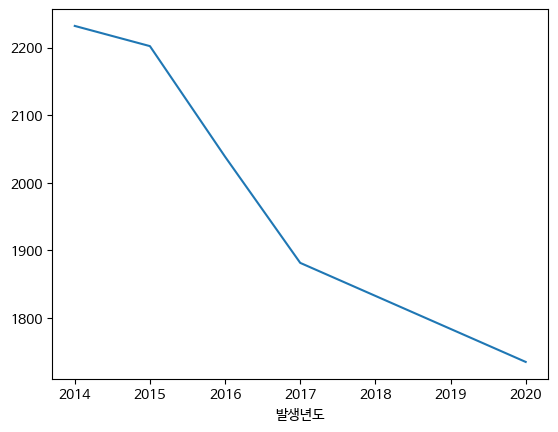

In [23]:
crime.groupby(['발생년도'])['소계'].mean().plot()


<Axes: xlabel='발생년도'>

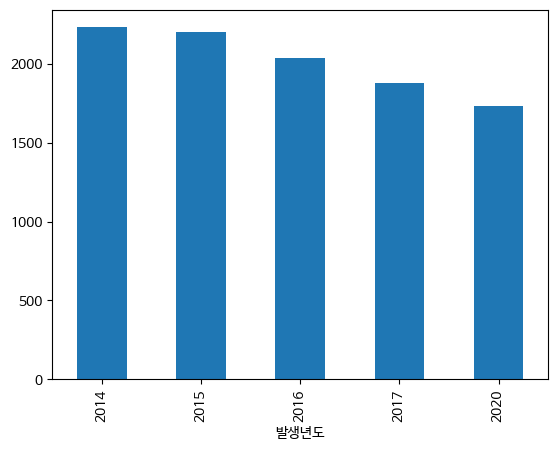

In [24]:
crime.groupby(['발생년도'])['소계'].mean().plot.bar()

In [25]:
#- Pivot Table instead of groupby
#- returns values as dataframe object

pd.pivot_table(crime, index=['발생년도'], values=['소계'], aggfunc='mean')

,소계
발생년도,
2014,2232.048000
2015,2202.155378
2016,2038.511905
2017,1881.385827
2020,1734.805447


<Axes: xlabel='발생년도'>

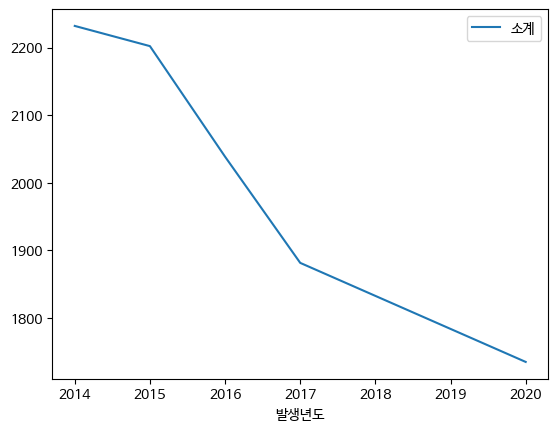

In [26]:
pd.pivot_table(crime, index=['발생년도'], values=['소계'], aggfunc='mean').plot()

<Axes: xlabel='발생년도'>

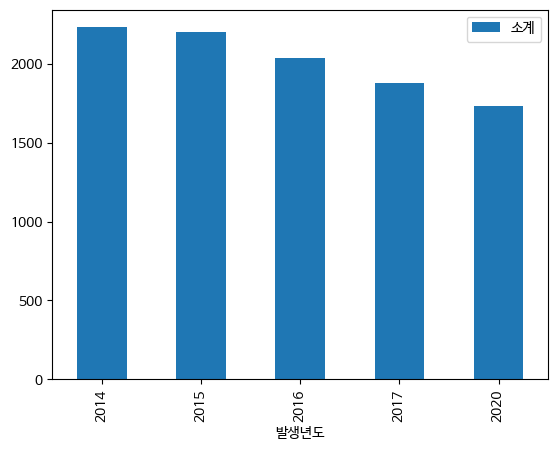

In [27]:
pd.pivot_table(crime, index=['발생년도'], values=['소계'], aggfunc='mean').plot.bar()

In [28]:
#- creating a culumn 'Province'


In [29]:
#- function for string indexing

def region(row):
    name = row[0:2]
    return name

In [30]:
crime['Region'] = crime['경찰서'].apply(region)
crime

,발생년도,경찰서,소계,살인,강도,절도,폭력,Region
0,2020,서울중부서,1944,1,3,943,997,서울
1,2020,서울종로서,1579,9,4,602,964,서울
2,2020,서울남대문서,1281,1,2,699,579,서울
3,2020,서울서대문서,2374,3,2,1077,1292,서울
4,2020,서울혜화서,1331,0,3,581,747,서울
...,...,...,...,...,...,...,...,...
1259,2014,경남함안서,522,4,5,237,276,경남
1260,2014,경남의령서,173,0,0,77,96,경남
1261,2014,제주서귀포서,2308,1,3,1120,1184,제주
1262,2014,제주동부서,4218,7,9,2149,2053,제주


In [31]:
crime.groupby(['Region'])['소계'].mean().round(2)

Region
강원     889.33
경기    2824.65
경남    1348.30
경북     952.08
광주    3160.56
대구    2457.72
대전    2816.28
부산    2554.55
서울    3521.22
세종    1760.00
울산    2804.48
인천    2998.81
전남     793.36
전북    1064.16
제주    3118.60
충남    1333.26
충북    1272.13
Name: 소계, dtype: float64

<Axes: xlabel='Region'>

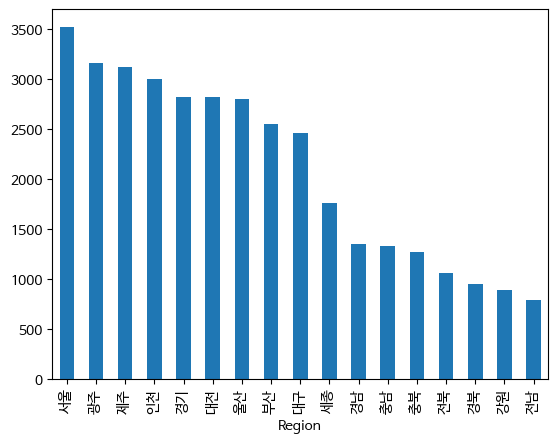

In [32]:
crime.groupby(['Region'])['소계'].mean().round(2).sort_values(ascending=False).plot.bar()

In [33]:
crime.groupby(['Region', '발생년도'])['소계'].mean().round(1)

#- return value : Series

Region  발생년도
강원      2014     935.6
        2015     933.2
        2016     945.6
        2017     915.3
        2020     717.0
                 ...  
충북      2014    1395.4
        2015    1383.5
        2016    1292.0
        2017    1149.8
        2020    1140.0
Name: 소계, Length: 81, dtype: float64

In [34]:
crime.groupby(['Region', '발생년도'])['소계'].mean().round(1).unstack()

#- in the case of mutil-index, unstack() makes one of index(normally the second one)
#- as a column and transform the Sries into the dataframe

발생년도,2014,2015,2016,2017,2020
Region,,,,,
강원,935.6,933.2,945.6,915.3,717.0
경기,3024.5,3063.0,2872.9,2708.6,2481.1
경남,1461.6,1474.7,1306.7,1213.2,1285.4
경북,1002.9,1016.7,956.1,888.5,896.2
광주,4131.4,3616.0,2943.0,2644.6,2467.8
대구,2842.1,2756.2,2381.9,2208.0,2100.4
대전,3681.6,3069.5,2702.7,2513.0,2258.8
부산,2883.7,2747.2,2491.2,2429.9,2220.7
서울,4039.1,3901.7,3607.6,3253.9,2803.7


In [35]:
#- missing value

In [36]:
crime[crime['Region'] == '세종']

,발생년도,경찰서,소계,살인,강도,절도,폭력,Region
82,2020,세종서,1760,8,2,876,874,세종


In [37]:
crime[crime['경찰서'].str.contains('세종')]

,발생년도,경찰서,소계,살인,강도,절도,폭력,Region
82,2020,세종서,1760,8,2,876,874,세종
417,2017,충남세종서,1308,6,3,584,715,충남
670,2016,충남세종서,1471,2,4,639,826,충남
921,2015,충남세종서,1112,3,0,647,462,충남
1171,2014,충남세종서,962,0,1,595,366,충남


In [38]:
crime[crime['Region'] == '세종']['Region']

82    세종
Name: Region, dtype: object

In [39]:
crime.loc[82, 'Region'] = '충남'

In [40]:
crime[crime['경찰서'].str.contains('세종')]

,발생년도,경찰서,소계,살인,강도,절도,폭력,Region
82,2020,세종서,1760,8,2,876,874,충남
417,2017,충남세종서,1308,6,3,584,715,충남
670,2016,충남세종서,1471,2,4,639,826,충남
921,2015,충남세종서,1112,3,0,647,462,충남
1171,2014,충남세종서,962,0,1,595,366,충남


In [41]:
reg_crime = crime.groupby(['Region', '발생년도'])['소계'].mean().round(1).unstack()

<Axes: xlabel='Region'>

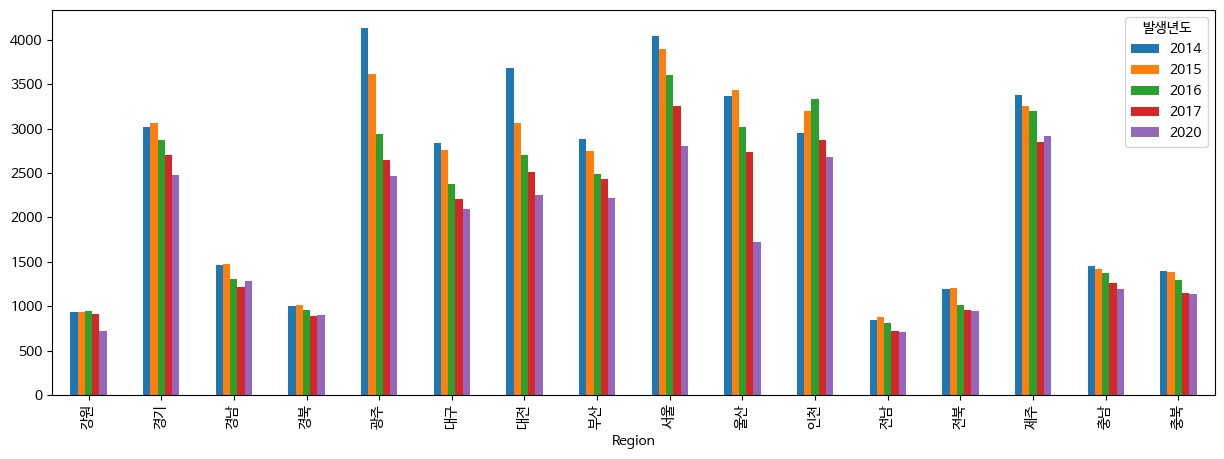

In [42]:
reg_crime.plot.bar(figsize=(15, 5))

<Axes: xlabel='Region'>

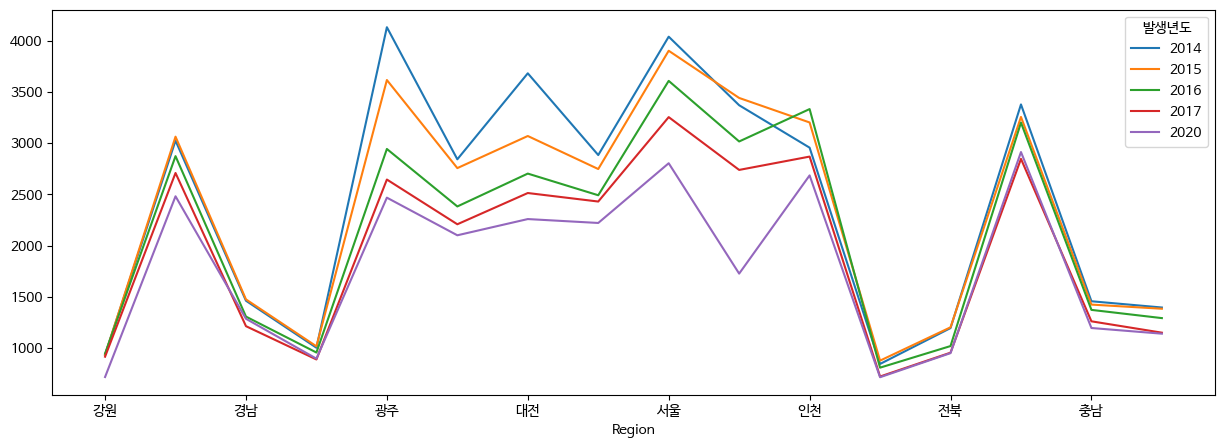

In [43]:
reg_crime.plot(figsize=(15, 5))

<Axes: xlabel='Region', ylabel='소계'>

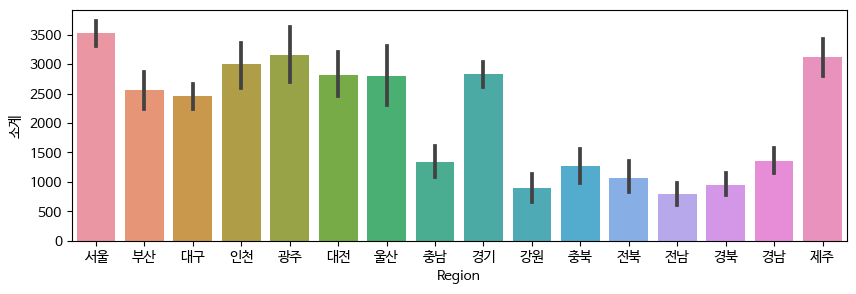

In [46]:
plt.figure(figsize=(10, 3))
sns.barplot(data=crime, x='Region', y='소계')

<Axes: xlabel='발생년도', ylabel='소계'>

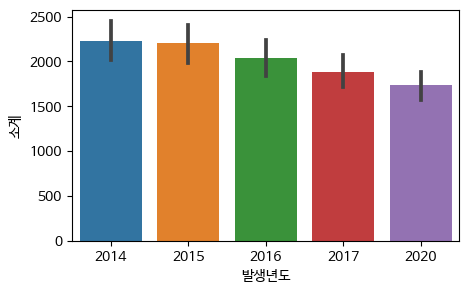

In [49]:
plt.figure(figsize=(5, 3))
sns.barplot(data=crime, x='발생년도', y='소계')

<Figure size 500x300 with 0 Axes>

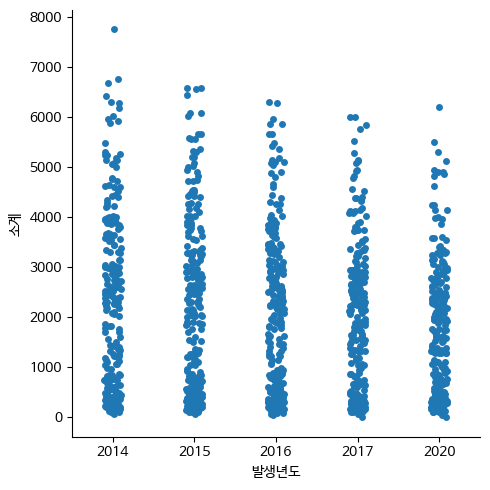

In [50]:
sns.catplot(data=crime, x='발생년도', y='소계')

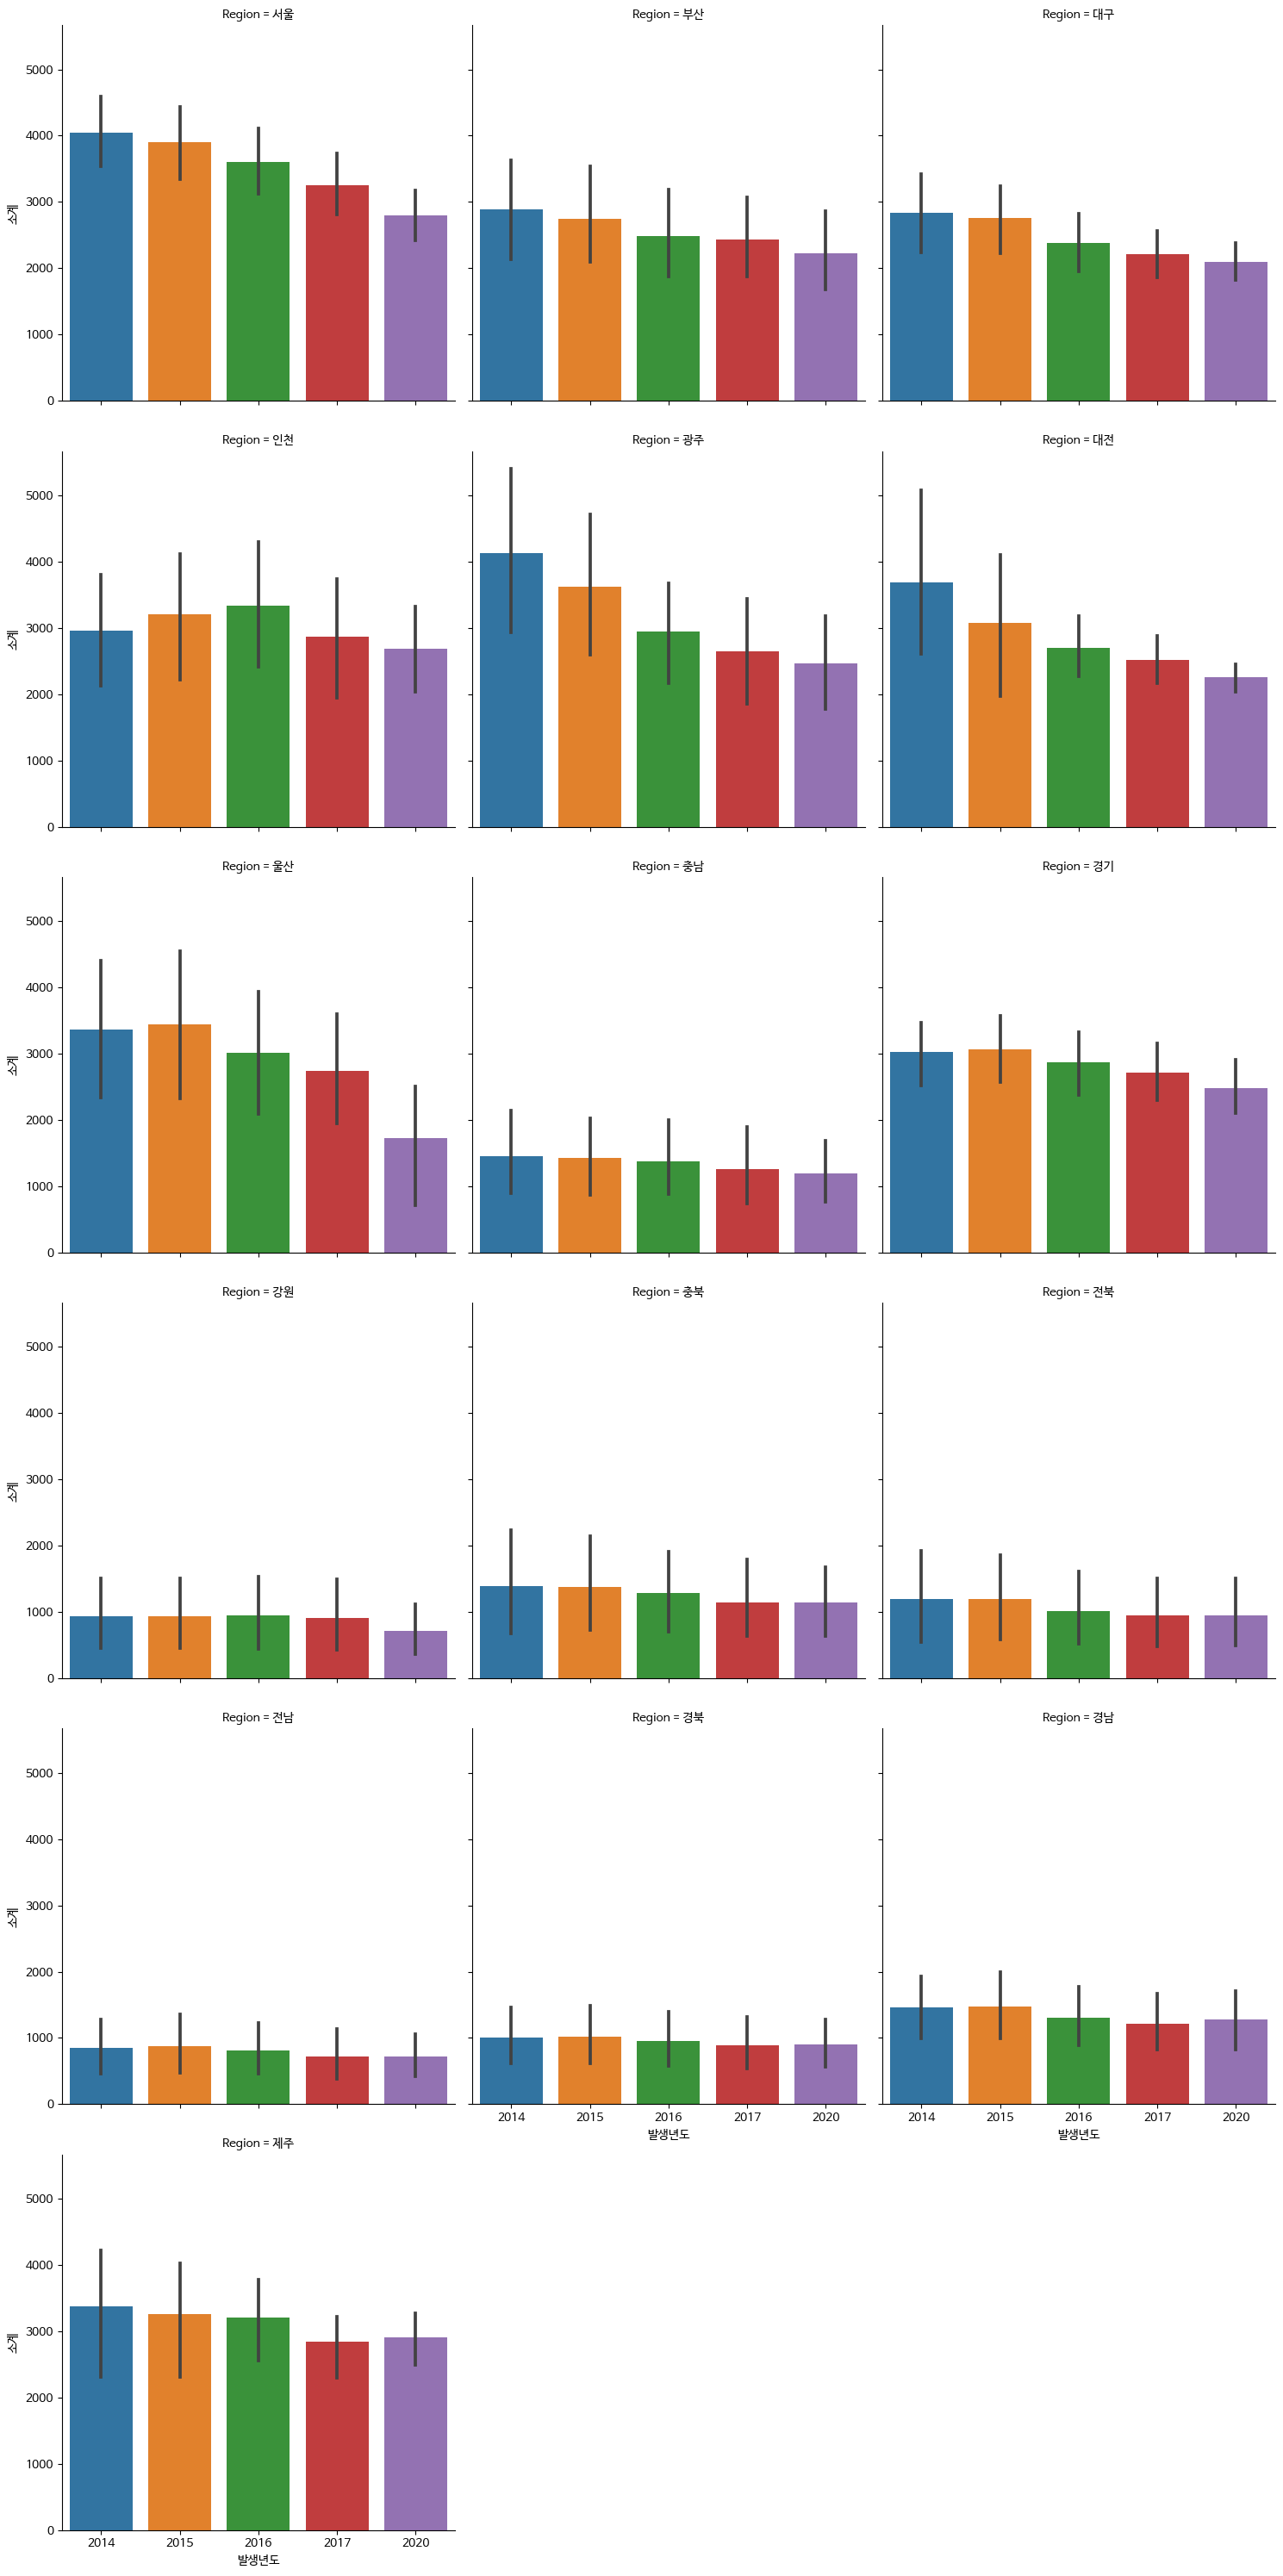

In [52]:
#- catplot to show sub-total per year per region

sns.catplot(data=crime, x='발생년도', y='소계', kind='bar', col='Region', col_wrap=3)

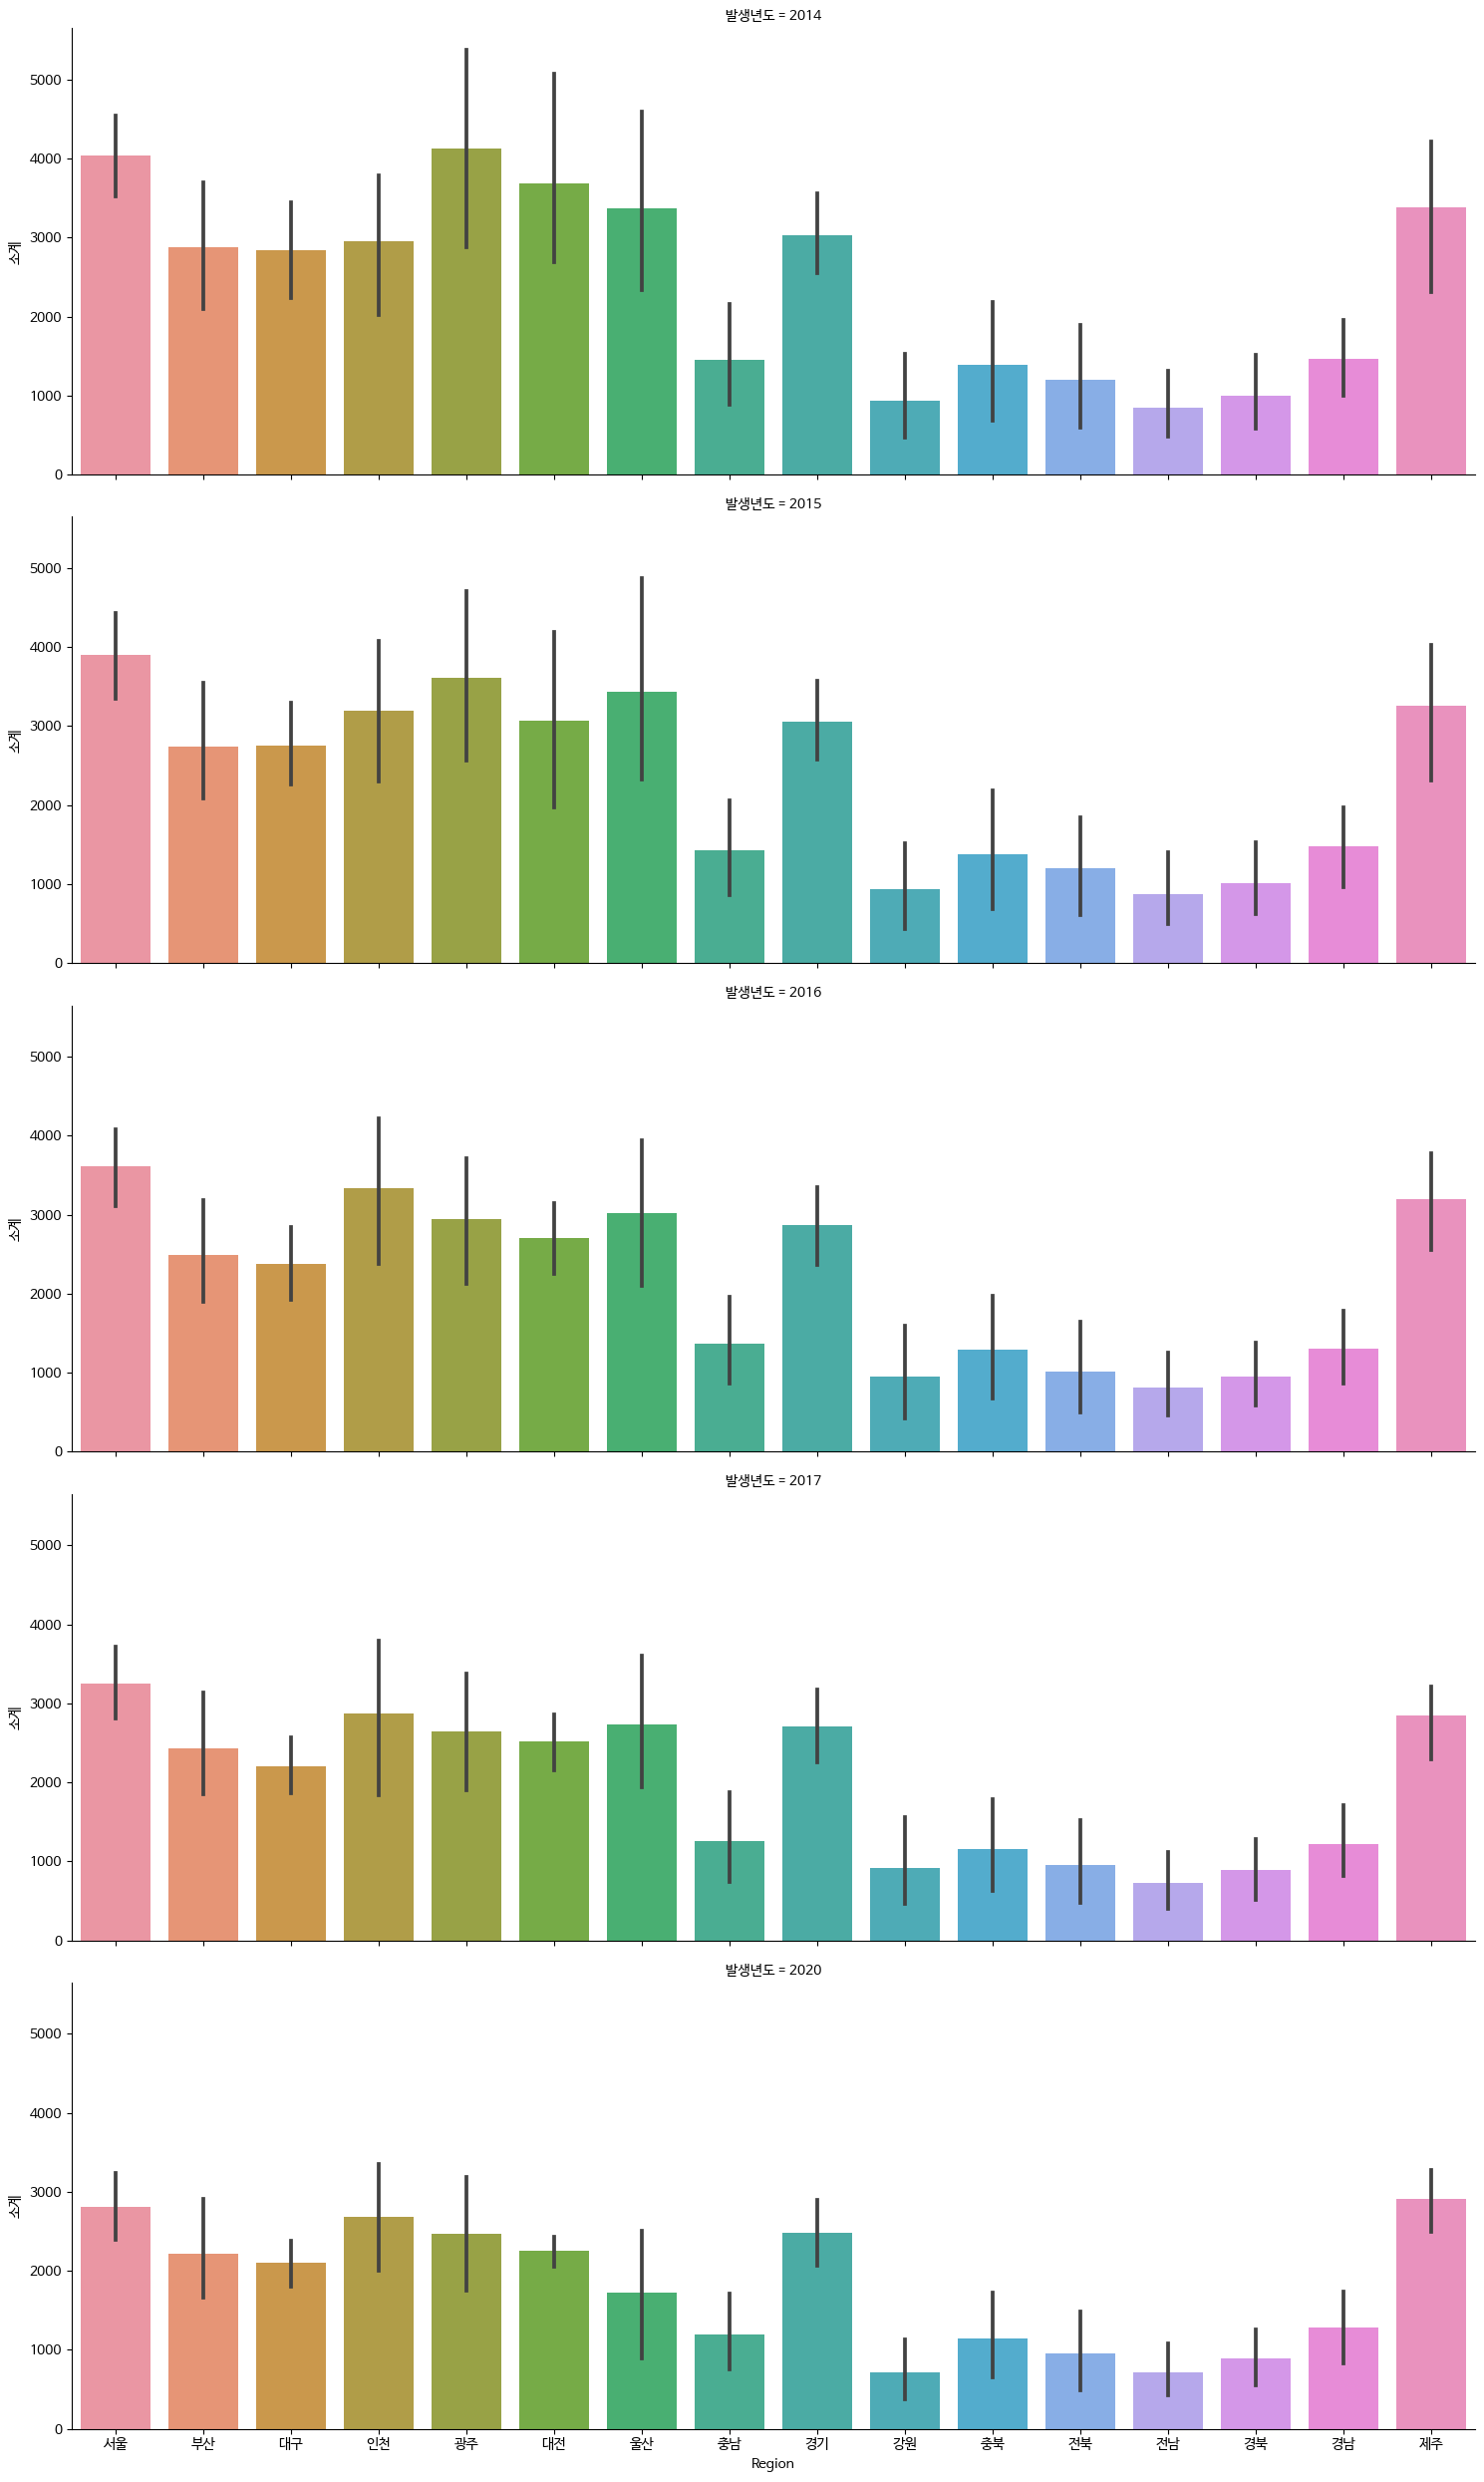

In [57]:
sns.catplot(data=crime, x='Region', y='소계', kind='bar', col='발생년도', col_wrap=1, height=5, aspect=15/5)

<Axes: xlabel='발생년도', ylabel='소계'>

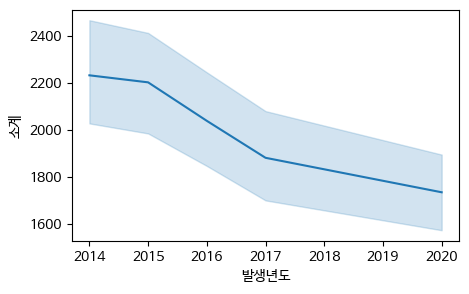

In [61]:
plt.figure(figsize=(5, 3))
sns.lineplot(data=crime, x='발생년도', y='소계')

<Axes: xlabel='발생년도', ylabel='소계'>

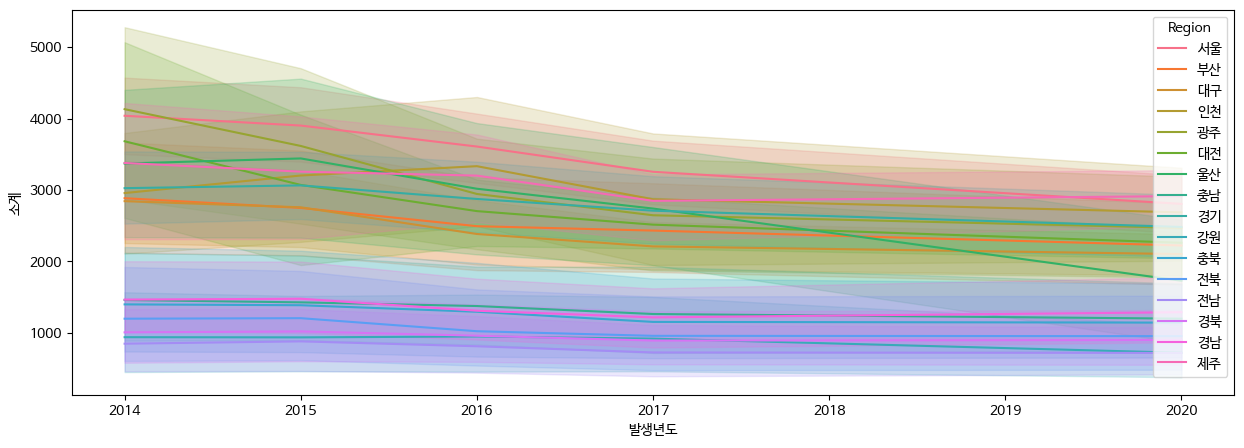

In [62]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=crime, x='발생년도', y='소계', hue='Region')

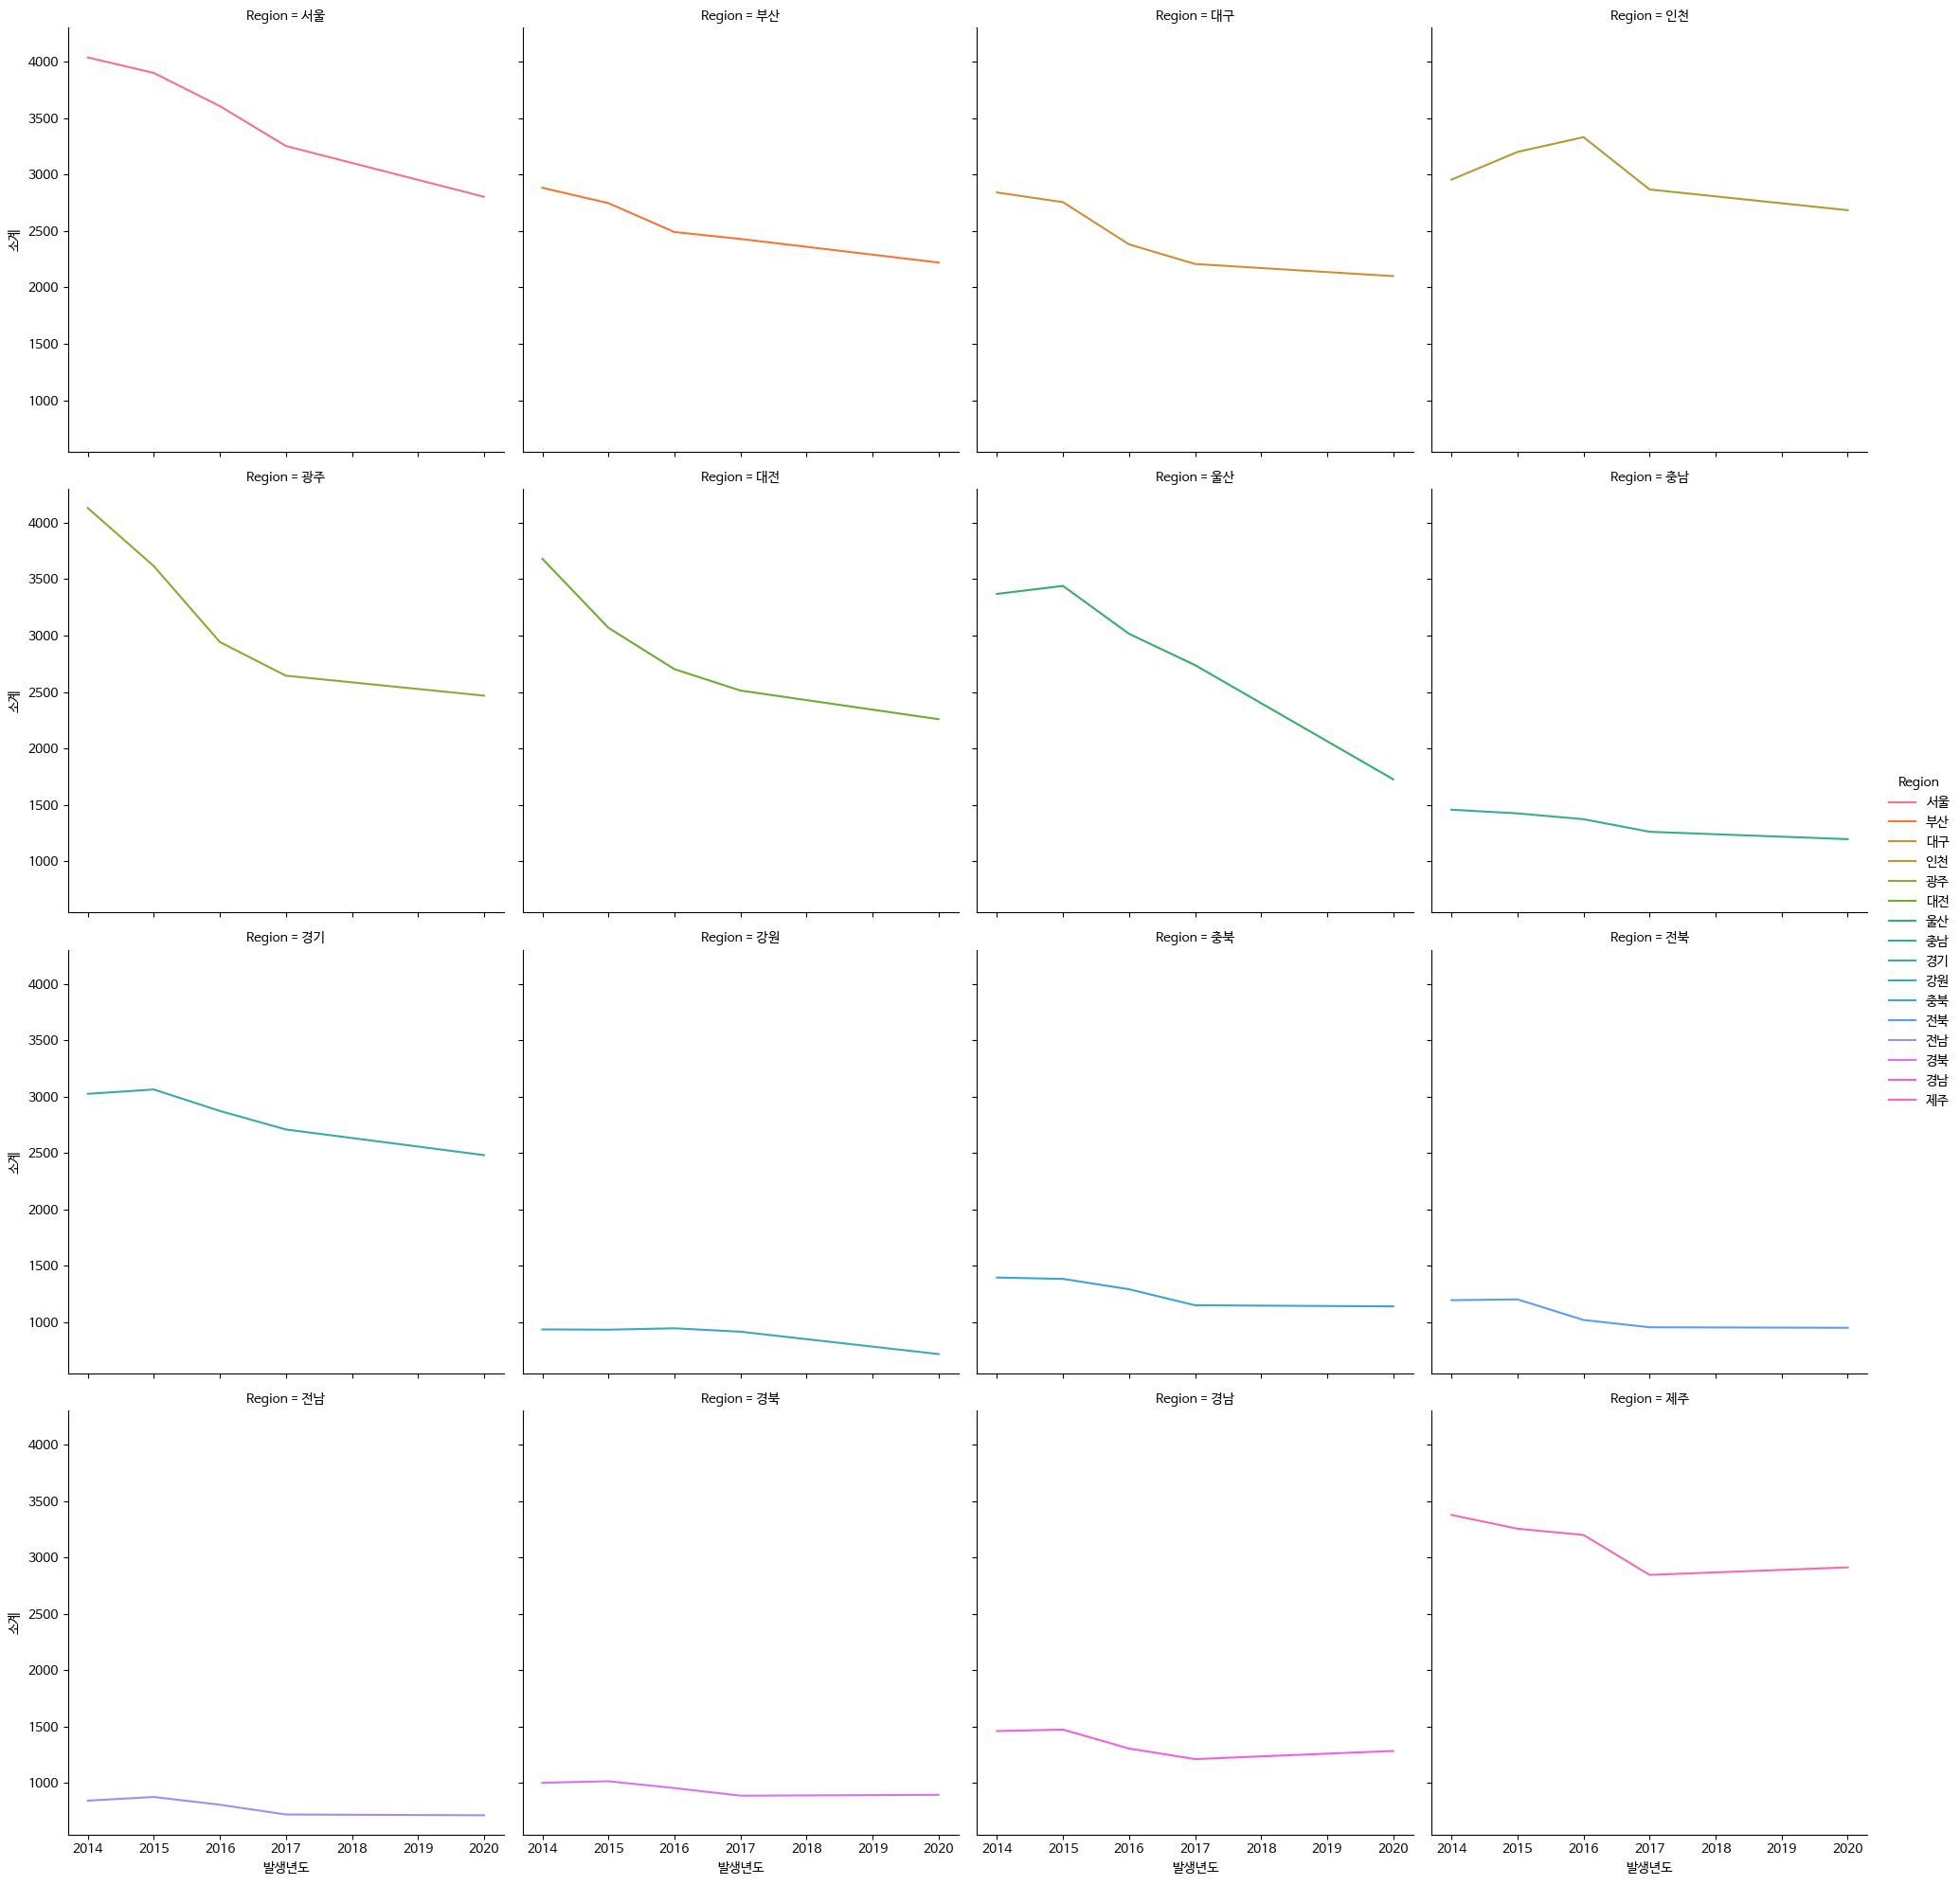

In [67]:
sns.relplot(data=crime, x='발생년도', y='소계', hue='Region', kind='line', col='Region', col_wrap=4, errorbar=None)

#- ci= attr is replaced to errobar

<Axes: xlabel='발생년도', ylabel='소계'>

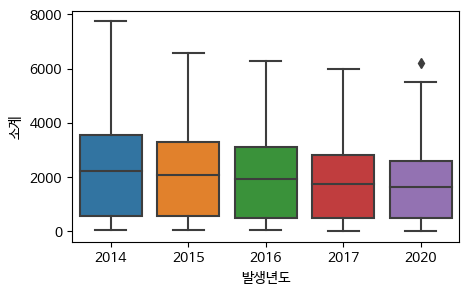

In [69]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=crime, x='발생년도', y='소계')

<Axes: xlabel='발생년도', ylabel='소계'>

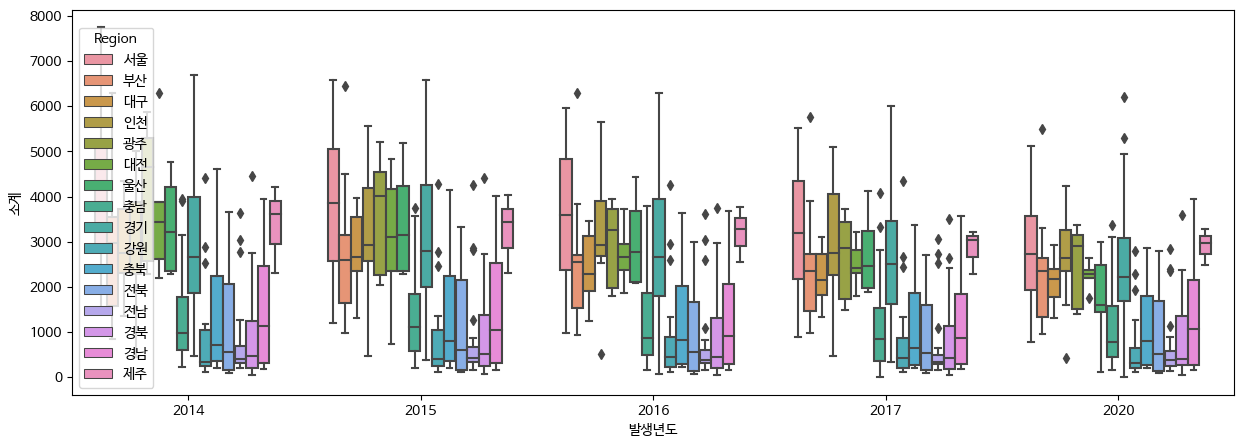

In [70]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=crime, x='발생년도', y='소계', hue='Region')

<Axes: xlabel='Region', ylabel='소계'>

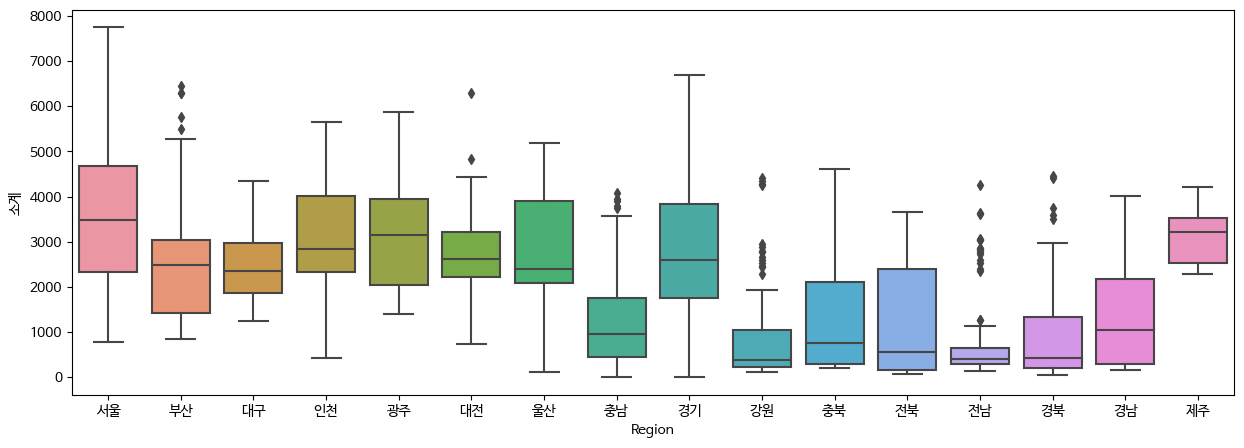

In [71]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=crime, x='Region', y='소계')

<Axes: xlabel='Region', ylabel='소계'>

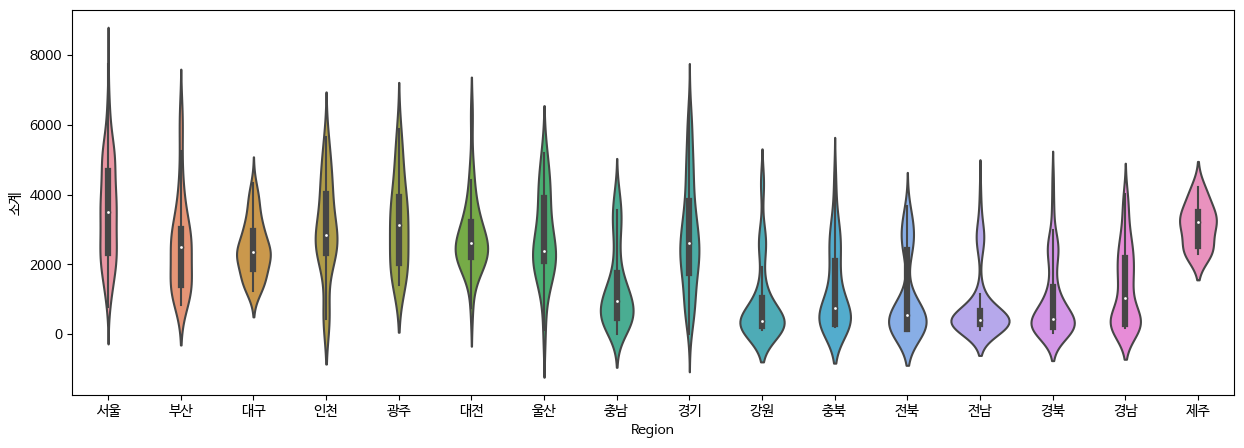

In [73]:
plt.figure(figsize=(15, 5))
sns.violinplot(data=crime, x='Region', y='소계')

<Axes: xlabel='발생년도', ylabel='소계'>

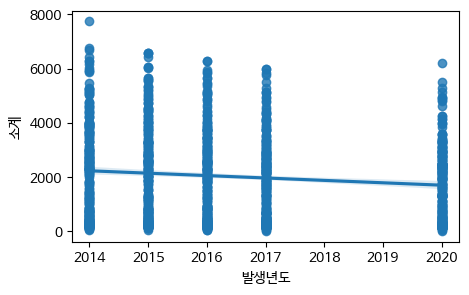

In [76]:
plt.figure(figsize=(5, 3))
sns.regplot(data=crime, x='발생년도', y='소계')

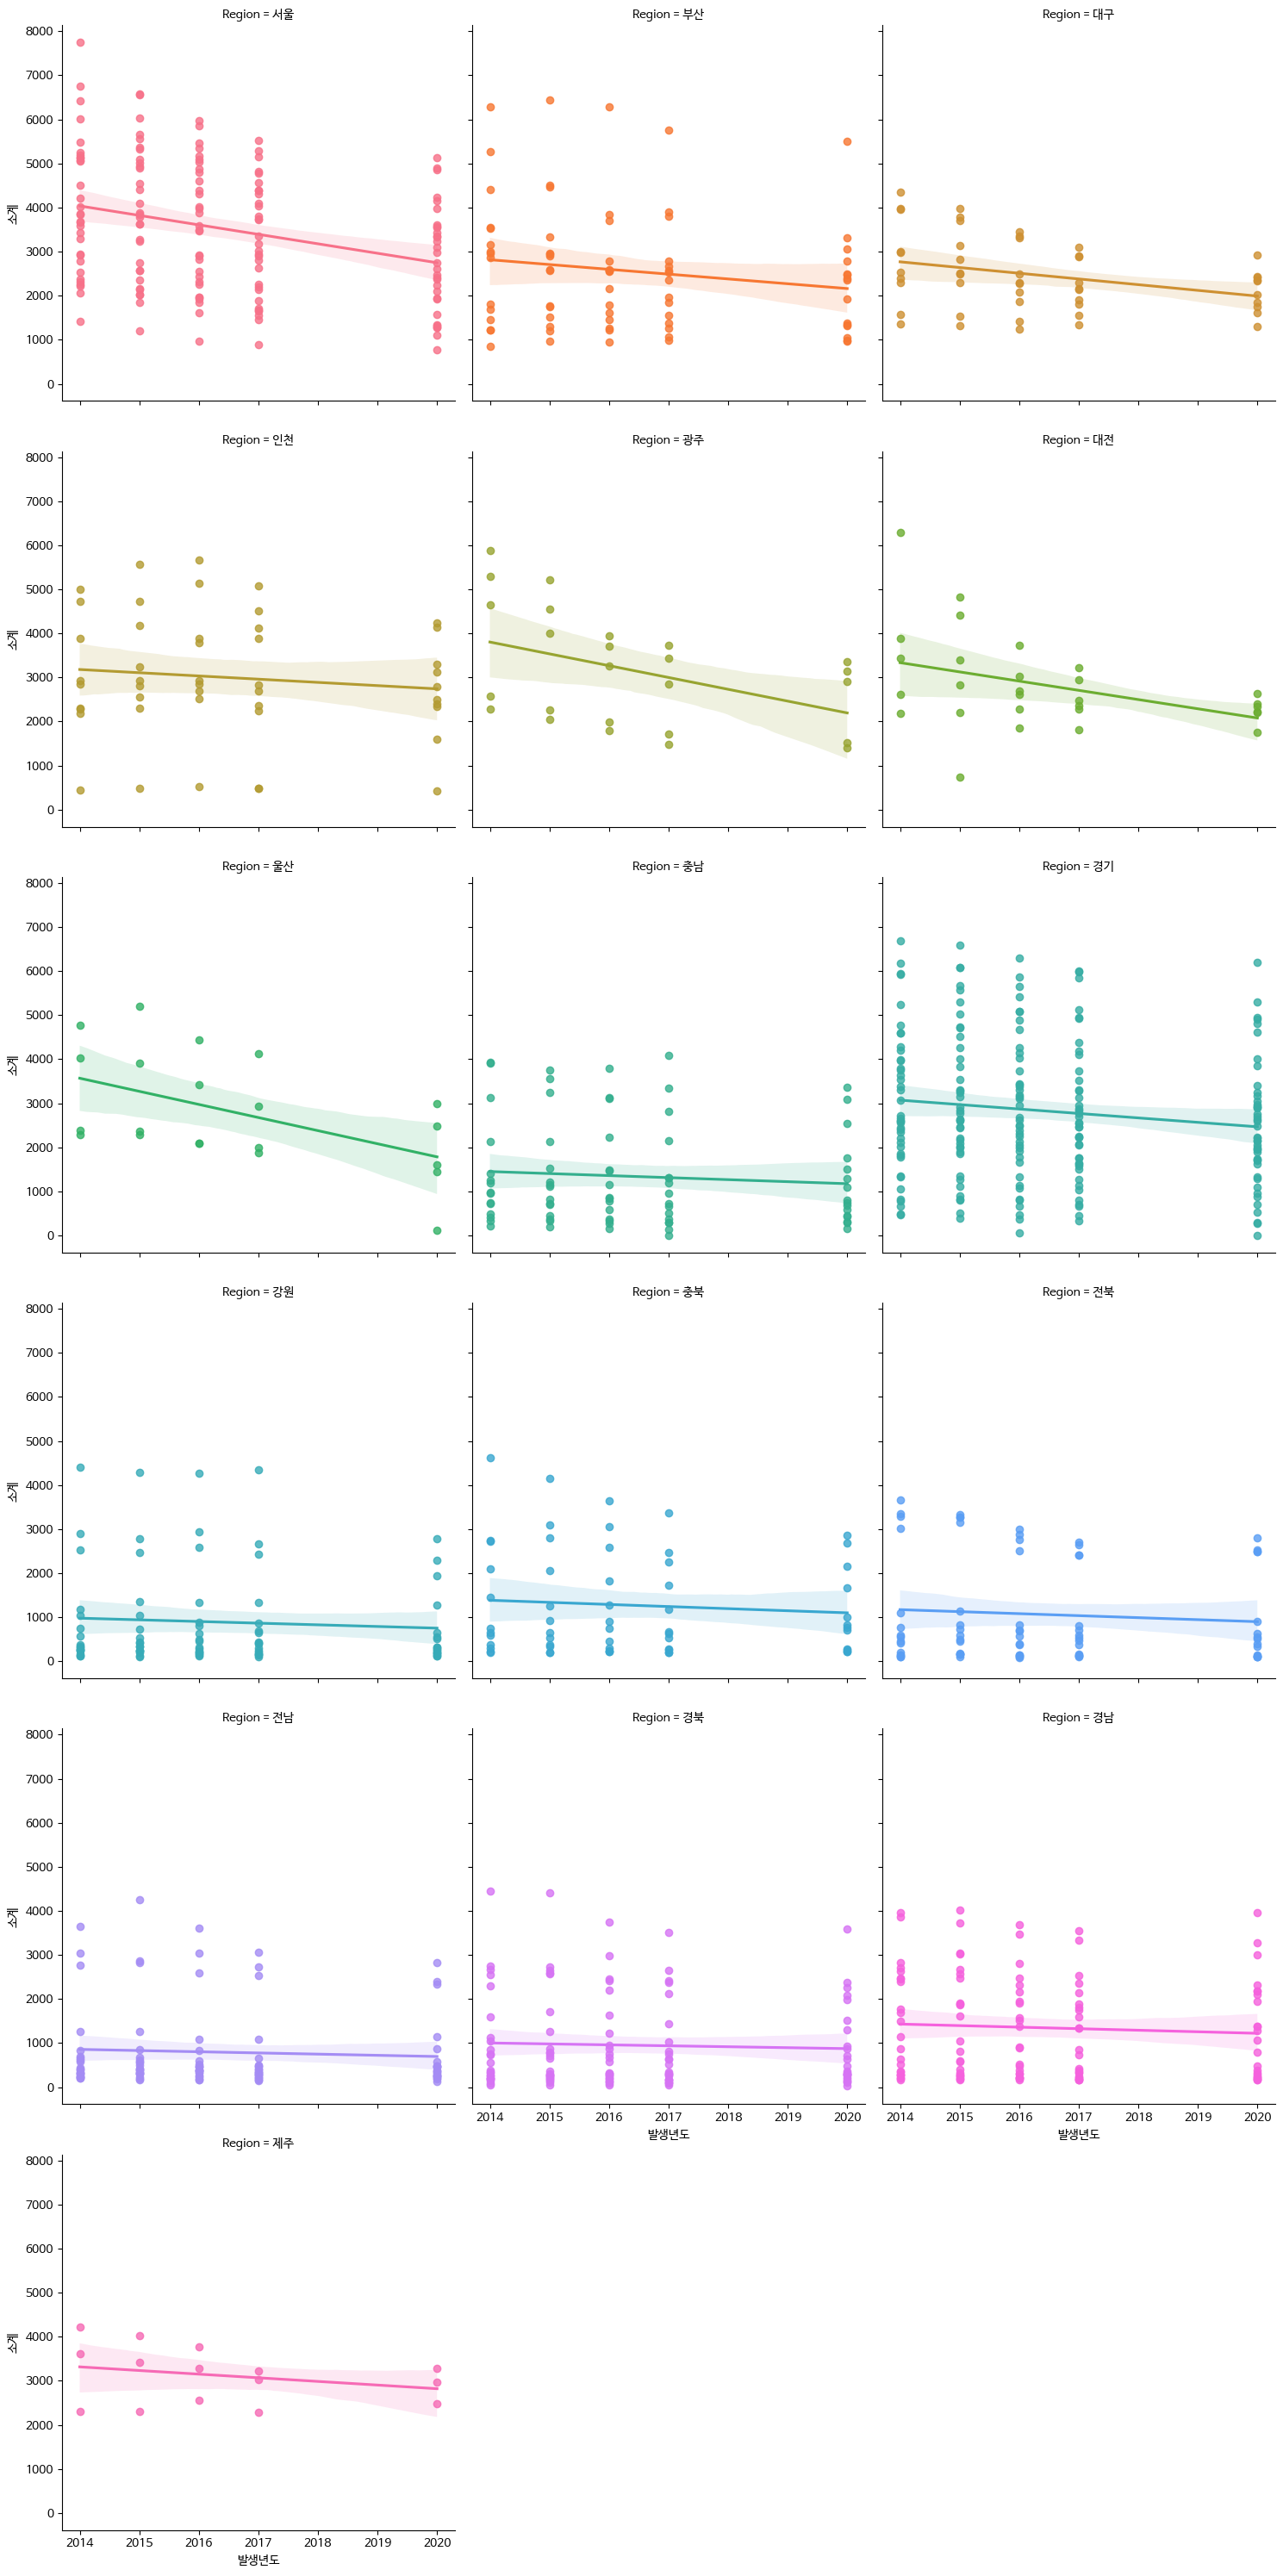

In [78]:
#- plt.figure(figsize=(5, 3))
sns.lmplot(data=crime, x='발생년도', y='소계', hue='Region', col='Region', col_wrap=3)

In [79]:
crime[(crime['소계'] >= 2000) & (crime['Region'] == '전남')]

,발생년도,경찰서,소계,살인,강도,절도,폭력,Region
186,2020,전남목포서,2829,0,5,1108,1716,전남
187,2020,전남여수서,2342,6,4,850,1482,전남
188,2020,전남순천서,2392,4,0,909,1479,전남
440,2017,전남목포서,3064,8,5,1015,2036,전남
441,2017,전남여수서,2738,4,5,821,1908,전남
442,2017,전남순천서,2525,5,4,809,1707,전남
692,2016,전남목포서,3603,6,5,1264,2328,전남
693,2016,전남여수서,3039,3,6,1064,1966,전남
694,2016,전남순천서,2596,5,4,882,1705,전남
943,2015,전남목포서,4262,3,10,1605,2644,전남


C:\Users\comra\AppData\Local\Temp\ipykernel_26952\1328016135.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crime['소계'])


<Axes: xlabel='소계', ylabel='Density'>

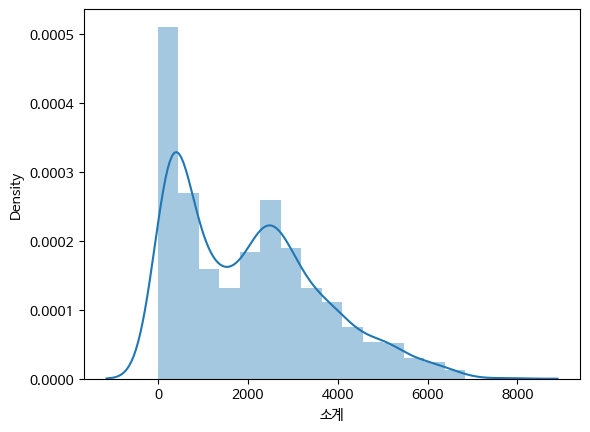

In [80]:
sns.distplot(crime['소계'])